In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
from google.colab import files

uploaded = files.upload()

Saving test.csv to test.csv


In [9]:
from google.colab import files

uploaded2 = files.upload()

Saving train.csv to train.csv


In [10]:
TRAIN_PATH="train.csv"
TEST_PATH="test.csv"

# **Import Packages**


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# **Reading Data**

In [12]:
train_data= pd.read_csv(TRAIN_PATH)
test_data= pd.read_csv(TEST_PATH)


# EDA

**Variable Notes**

pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

In [51]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
print('Number of Training = {}'.format(train_data.shape[0]))

#target columns
train_data.columns

Number of Training = 891


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
#check for null values

train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Missing values heatmap')

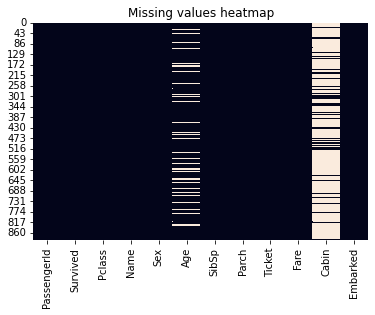

In [53]:

sns.heatmap(train_data.isnull(), cbar = False).set_title("Missing values heatmap")

**Look at numeric and categorical values separately:**

Numerical Features: Age, Fare, SibSp, Parch.

Categorical Features: Survived, Sex, Embarked, Pclass.

Alphanumeric Features (but categorical): Ticket, Cabin.

you will notice that:

- Tickets and Cabin are features with a high cardinality, and a lot of distinc values. 
- Age and Cabin has a lot of missing values.
- Name and ID has unique values.
- SibSp, Parch and Fare has a lot of zeros. 

Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown. More than 70% of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded from Queenstown. People who boarded from Cherbourg had a higher chance of survival than people who boarded from Southampton or Queenstown.

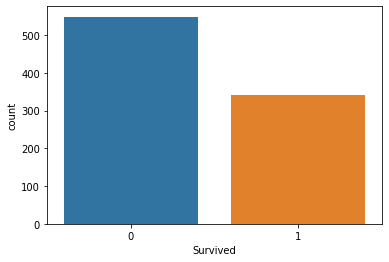

In [17]:
##How many people survived?

sns.countplot(x="Survived" , data=train_data)


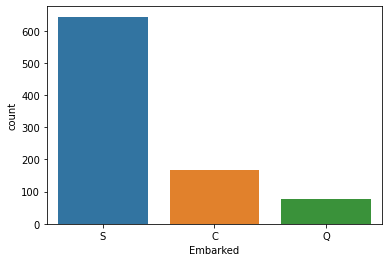

In [19]:
# Feature Embarked

sns.countplot(x="Embarked" , data=train_data)

# Embarked is a nominal feature

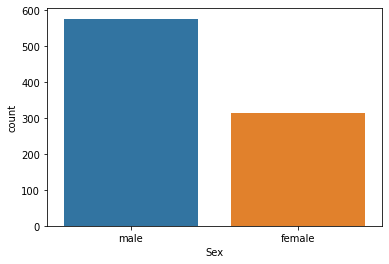

In [18]:
# Feature Sex

sns.countplot(x="Sex" , data=train_data)

# Sex is nominal feature

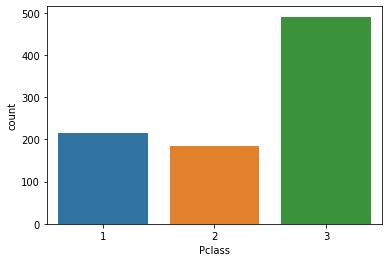

In [20]:
# Feature Pclass

sns.countplot(x="Pclass" , data=train_data)

# Pclass is ordinal feature

#  Preprocessing

In [21]:
train_copy= train_data.copy()

##  Remove irrelevant columns

In [22]:
irrelavant_columns=["Name", "PassengerId","Ticket"]
train_copy.drop(irrelavant_columns, axis=1, inplace=True)

# **Splitting Data**


In [23]:
# Split the data into predictors and target
X = train_copy.drop(['Survived'], axis = 1)
X_test = test_data.drop(irrelavant_columns, axis = 1)
Y= train_data['Survived']

In [24]:
X_train, X_val, Y_train, Y_val= train_test_split(X,Y, test_size=0.3, random_state=21, stratify=Y)

#  Numerical features handling


In [25]:
# create a pipline for the numeric features

# Difine a list with the numeric features
numeric_features = ['Age', 'Fare','SibSp','Parch']
# Define a pipeline for numer"ic features
numeric_features_pipeline = Pipeline(steps= [
    ('imputer', SimpleImputer(strategy = 'median')), # Impute with median value for missing
    ('scaler', StandardScaler())                     # Conduct a scaling step
])

# Categorical features handling


In [26]:
#  create a pipline for the categorical features
# Difine a list with the categorical features
categorical_features = ['Embarked', 'Sex']
# Define a pipeline for categorical features
categorical_features_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value = 'missing')), # Impute with the word 'missing' for missing values
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))     # Convert all categorical variables to one hot encoding
])

# **Ordinal features handling**


In [27]:
# create a pipline for the ordinal features
# Define a list with the ordinal features
ordinal_features = ['Pclass']
# Define a pipline for ordinal features 
ordinal_features_pipeline = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories= [[1, 2, 3]]))
])

# **Construct a comprehended preprocessor**
create a preprocessor that can handle all columns in our dataset using ColumnTransformer

In [28]:
# create a transformer to handle all columns
preprocessor = ColumnTransformer(transformers= [
    # transformer with name 'num' that will apply
    # 'numeric_features_pipeline' to numeric_features
    ('num', numeric_features_pipeline, numeric_features),
    
    # transformer with name 'cat' that will apply 
    # 'categorical_features_pipeline' to categorical_features
    ('cat', categorical_features_pipeline, categorical_features),
    
    # transformer with name 'ord' that will apply 
    # 'ordinal_features_pipeline' to ordinal_features
    ('ord', ordinal_features_pipeline, ordinal_features) 
    ])

# **Prediction Pipeline**


In [29]:
clf=Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', LogisticRegression())])

# **Pipeline Training**

In [30]:
# fit our classifier
clf.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
         

In [31]:
pred = clf.predict(X_val)

In [32]:
acc=round(accuracy_score(pred, Y_val)*100,2)
acc

79.85

# **Generate Predictions**


In [39]:
# Generate predictions
predictions = clf.predict(X_test)
# Generate results dataframe
results_df = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# Save to csv file
results_df.to_csv('submission.csv', index = False)


In [45]:
print(X_test.head(1))

   Pclass   Sex   Age  SibSp  Parch    Fare Cabin Embarked
0       3  male  34.5      0      0  7.8292   NaN        Q


In [50]:
new_person =clf.predict(X_test.head(1))

In [49]:
new_person

array([0, 0, 0, 0])